In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Loading

In [2]:
import pandas as pd
df = pd.read_csv("D:/Phones_gyroscope.csv")

In [3]:
df.shape

(13932632, 10)

In [4]:
df.head(5)

,sample_id,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand


In [5]:
df.describe(include="all")

,sample_id,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
count,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07,13932632,13932632,13932632,12063005
unique,NaN,NaN,NaN,NaN,NaN,NaN,9,3,6,6
top,NaN,NaN,NaN,NaN,NaN,NaN,e,nexus4,s3_2,walk
freq,NaN,NaN,NaN,NaN,NaN,NaN,1747088,6241005,3185323,2350429
mean,1.656943e+05,1.424744e+12,6.382965e+17,3.315133e-03,-9.459769e-03,-8.930509e-03,NaN,NaN,NaN,NaN
std,1.035116e+05,4.401267e+07,7.084178e+17,4.472657e-01,4.498820e-01,5.141587e-01,NaN,NaN,NaN,NaN
min,0.000000e+00,1.424687e+12,1.019237e+12,-4.128174e+00,-7.992025e+00,-5.278381e+00,NaN,NaN,NaN,NaN
25%,7.698800e+04,1.424697e+12,1.367526e+14,-1.252274e-01,-1.294556e-01,-1.788367e-01,NaN,NaN,NaN,NaN
50%,1.562920e+05,1.424777e+12,3.499154e+14,3.509521e-04,-2.243042e-03,-7.781982e-04,NaN,NaN,NaN,NaN
75%,2.518360e+05,1.424783e+12,1.424777e+18,1.432479e-01,1.101379e-01,1.378482e-01,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

sample_id              0
Arrival_Time           0
Creation_Time          0
x                      0
y                      0
z                      0
User                   0
Model                  0
Device                 0
gt               1869627
dtype: int64

In [7]:
df['gt'].unique()

array(['stand', nan, 'sit', 'walk', 'stairsup', 'stairsdown', 'bike'],
      dtype=object)

In [8]:
df['gt'] = df['gt'].fillna(df['gt'].mode()[0])

In [9]:
df['gt'].isnull().sum()

0

In [10]:
df['gt'].unique()

array(['stand', 'walk', 'sit', 'stairsup', 'stairsdown', 'bike'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932632 entries, 0 to 13932631
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   sample_id      int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.0+ GB


# Exploratory Data Analysis

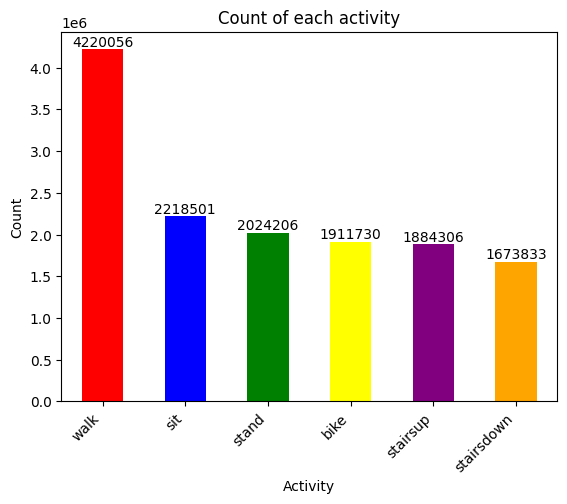

In [12]:
import matplotlib.pyplot as plt
ax= df['gt'].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'])
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Count of each activity")
plt.xticks(rotation=45, ha='right')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), i.get_height(), ha='center', va='bottom')
plt.show()

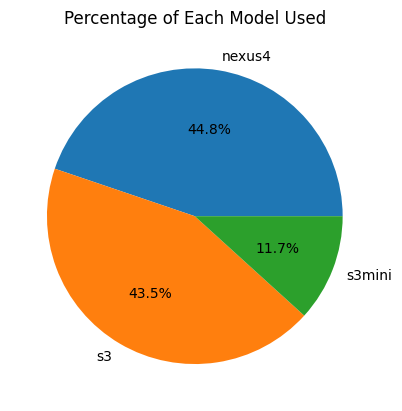

In [13]:
model_counts = df['Model'].value_counts()
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Each Model Used')
plt.show()


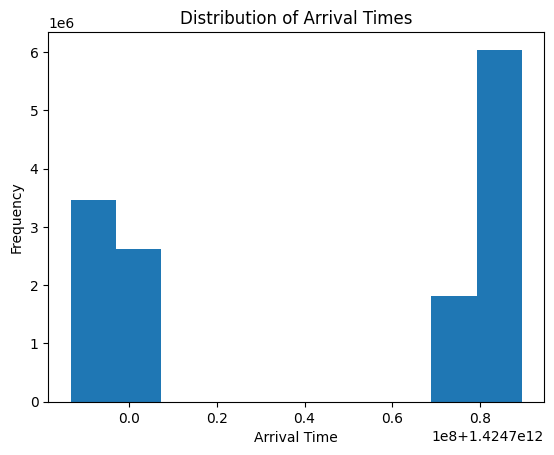

In [14]:
plt.hist(df['Arrival_Time'])
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Times')
plt.show()


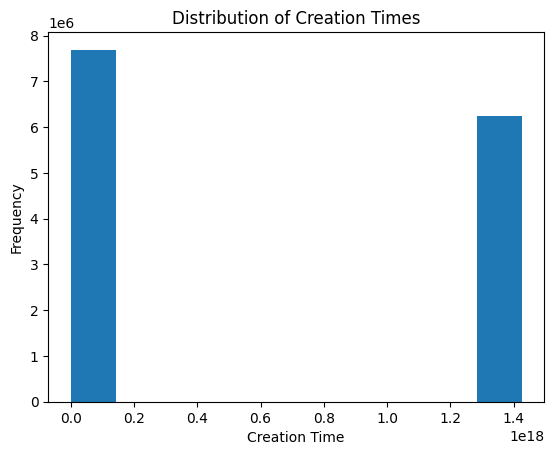

In [15]:
plt.hist(df['Creation_Time'])
plt.xlabel('Creation Time')
plt.ylabel('Frequency')
plt.title('Distribution of Creation Times')
plt.show()


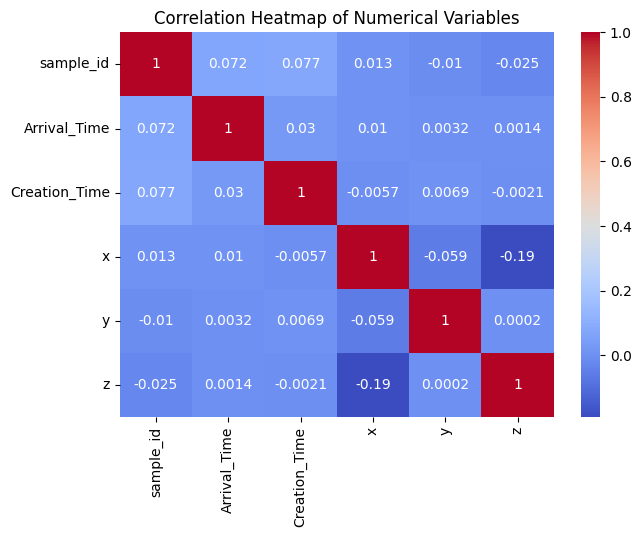

In [16]:
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float', 'int']).columns

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

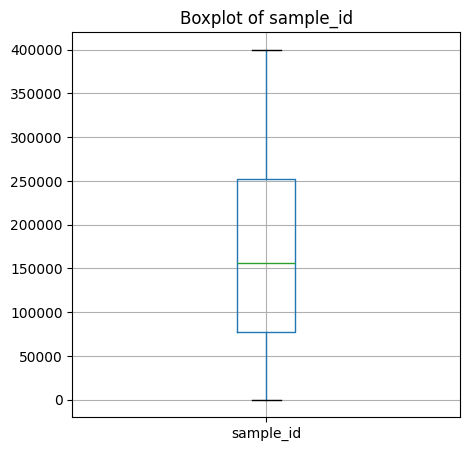

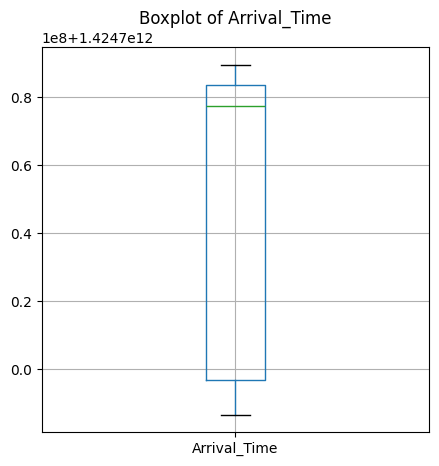

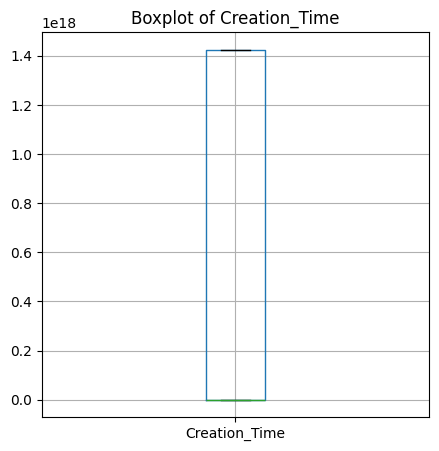

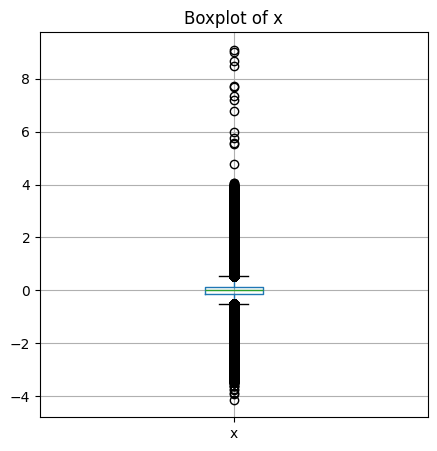

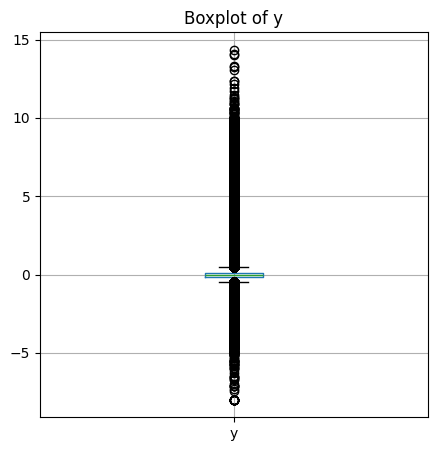

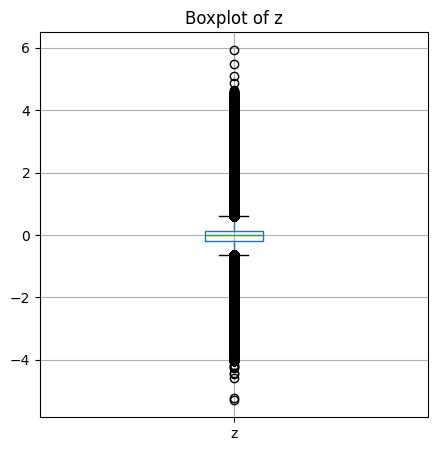

In [17]:
for column in numerical_cols:
    plt.figure(figsize=(5,5))
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [18]:
from scipy import stats

# Calculating z score for x,y,z
df['x_zscore'] = stats.zscore(df['x'])
df['y_zscore'] = stats.zscore(df['y'])
df['z_zscore'] = stats.zscore(df['z'])

# Filtering out outliers
df_new = df[(df['x_zscore'].abs() <= 4) &
                 (df['y_zscore'].abs() <= 4) &
                 (df['z_zscore'].abs() <= 4)]

# Droping the columns which had z-score
df_new = df_new.drop(['x_zscore', 'y_zscore', 'z_zscore'], axis=1)

In [19]:
df_new.shape

(13707743, 10)

The data now contains 13707743 rows after removing the outliers

In [20]:
df_new.shape

(13707743, 10)

In [21]:
df_new.columns

Index(['sample_id', 'Arrival_Time', 'Creation_Time', 'x', 'y', 'z', 'User',
       'Model', 'Device', 'gt'],
      dtype='object')

In [22]:
import pandas as pd
from sklearn.utils import resample
#upsampling the target data column
activity_column = 'gt'

# Separating majority and minority classes
df_majority = df_new[df_new[activity_column]=='stand']
df_minority1 = df_new[df_new[activity_column]=='sit']
df_minority2 = df_new[df_new[activity_column]=='walk']
df_minority3 = df_new[df_new[activity_column]=='stairsup']
df_minority4 = df_new[df_new[activity_column]=='stairsdown']
df_minority5 = df_new[df_new[activity_column]=='bike']

# Upsampling minority classes
df_minority1_upsampled = resample(df_minority1, replace=True, n_samples=len(df_majority), random_state=42)
df_minority2_upsampled = resample(df_minority2, replace=True, n_samples=len(df_majority), random_state=42)
df_minority3_upsampled = resample(df_minority3, replace=True, n_samples=len(df_majority), random_state=42)
df_minority4_upsampled = resample(df_minority4, replace=True, n_samples=len(df_majority), random_state=42)
df_minority5_upsampled = resample(df_minority5, replace=True, n_samples=len(df_majority), random_state=42)

# Combining majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled, df_minority3_upsampled, df_minority4_upsampled, df_minority5_upsampled])

# Displaying new count of each class
print(df_upsampled[activity_column].value_counts())

gt
stand         2024198
sit           2024198
walk          2024198
stairsup      2024198
stairsdown    2024198
bike          2024198
Name: count, dtype: int64


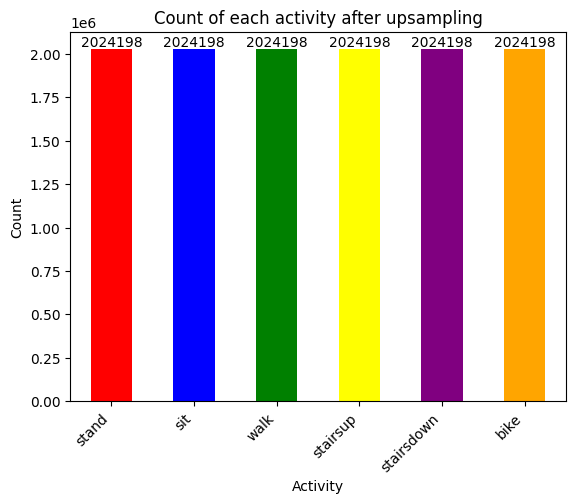

In [23]:
ax = df_upsampled['gt'].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'])
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Count of each activity after upsampling")
plt.xticks(rotation=45, ha='right')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), i.get_height(), ha='center', va='bottom')
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
le = LabelEncoder()

# Identifing categorical columns
categorical_cols = df_upsampled.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
for col in categorical_cols:
  df_upsampled[col] = le.fit_transform(df_upsampled[col])

# Displaying the updated DataFrame
df_upsampled.head()


,sample_id,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,0,0,0,4
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,0,0,0,4
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,0,0,0,4
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,0,0,0,4
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,0,0,0,4


In [25]:
df_upsampled = df_upsampled.drop('sample_id', axis=1)
df_upsampled.head()


,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,0,0,0,4
1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,0,0,0,4
2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,0,0,0,4
3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,0,0,0,4
4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,0,0,0,4


In [26]:
df_upsampled['gt'].unique()

array([4, 1, 5, 3, 2, 0])

In [27]:
from sklearn.model_selection import train_test_split
X = df_upsampled.drop('gt', axis=1)
y = df_upsampled['gt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:

import pandas as pd


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
y_pred=rf_model.predict(X_train)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
# Making predictions on the test set
rf_test_pred = rf_model.predict(X_test) 
accuracy = accuracy_score(y_test, rf_test_pred)
print("Accuracy:", accuracy)

# Calculating F1-score (weighted average for multiclass)
f1 = f1_score(y_test, rf_test_pred, average='weighted')
print("F1 Score:", f1)

# Generating classification report
report = classification_report(y_test, rf_test_pred)
print("Classification Report:\n", report)


Accuracy: 0.9833880737971163
F1 Score: 0.9833925230757677
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    404455
           1       0.99      0.99      0.99    404903
           2       0.96      0.97      0.97    406264
           3       0.97      0.97      0.97    404119
           4       0.99      0.99      0.99    405282
           5       0.99      0.98      0.99    404015

    accuracy                           0.98   2429038
   macro avg       0.98      0.98      0.98   2429038
weighted avg       0.98      0.98      0.98   2429038



In [39]:
y_test_pred=rf_model.predict(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

In [43]:
y_pred

array([0, 4, 2, ..., 2, 3, 3])

In [48]:
rf_train_probs = rf_model.predict_proba(X_train)

In [49]:
rf_test_probs = rf_model.predict_proba(X_test) 

In [50]:
#Createing a new dataset for the Gradient Boosting model
X_train_gb = pd.DataFrame(rf_train_probs, columns=[f'rf_prob_{i}' for i in range(rf_train_probs.shape[1])])
X_test_gb = pd.DataFrame(rf_test_probs, columns=[f'rf_prob_{i}' for i in range(rf_test_probs.shape[1])])

In [53]:
#Training the Gradient Boosting model using the new dataset
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_gb, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
# Making predictions and evaluate the Gradient Boosting model
y_pred = gb_model.predict(X_test_gb)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gradient Boosting model: {accuracy:.2f}')

Accuracy of Gradient Boosting model: 0.98


In [55]:
# Calculating F1-score (weighted average for multiclass)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generating classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


F1 Score: 0.9831086974561015
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    404455
           1       0.99      0.99      0.99    404903
           2       0.96      0.97      0.97    406264
           3       0.97      0.97      0.97    404119
           4       0.99      0.99      0.99    405282
           5       0.99      0.98      0.98    404015

    accuracy                           0.98   2429038
   macro avg       0.98      0.98      0.98   2429038
weighted avg       0.98      0.98      0.98   2429038

